# Побудова моделі


<h2>Мета</h2>

Ознайомитись з різновидами регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Будувати регресійні моделі кількох видів
* Оцінювати якість моделі візуально
* Оцінювати якість моделі за допомогою числових мір, без використання тестової вибірки
* Виконувати прогнозування відгуку, використовуючи побудовану модель



<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>

1. Скачати дані із файлу "clean_data2.csv" (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.
2. Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.
3. Побудуйте кілька поліноміальних моделей другого порядку.
4. Побудуйте візуалізації для оцінки всіх моделей.
5. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.


<a name="task1"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. </p><p>В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.</p>
</div>

Зчитую дані з файлу у датафрейм


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

path = "/content/drive/My Drive/data/clean_data2.csv"
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<p>З попередньої роботи знаємо, що хорошими показниками для 'CO2 emission' можуть бути:</p>
<ul>
    <li>Population</li>
    <li>Area</li>
</ul>
Розробимо моделі, використовуючи ці ознаки як змінні-предиктори.

<p>Створюю об’єкт лінійної регресії та навчаю першу модель</p>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

Використовуючи просту лінійну регресію, створимо лінійну функцію з 'Population' як змінною-предиктором і 'CO2 emission' як змінною-відгуком

In [ ]:
X = df[['Population']]
Y = df['CO2 emission']

Будую лінійну модель та виводжу прогноз

In [ ]:
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]

array([166725.94304326,  13118.67670299, 195485.17184303,   -514.12828729,
         -409.32904311])

Знаходжу коефіцієнти моделі


Значення intercept (a)

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
lm.intercept_


-782.8642515405954

Значення slope (b)

In [ ]:
lm.coef_


array([0.00483347])

Отримали кінцеву лінійну модель зі структурою:
$$
Yhat1 = a + b  X
$$

Підставляючи фактичні значення, маємо:

In [ ]:
# Напишіть рівняння моделі, виконувати не потрібно

# CO2emission = −782.8642515405081 + 0.00483347 ∗ Population

Створюю об’єкт лінійної регресії та навчаю другу модель


In [ ]:
from os import X_OK
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
lm2 = LinearRegression()
lm2
X = df[['Area']]
Y = df['CO2 emission']
lm2.fit(X,Y)
Yhat=lm2.predict(X)
Yhat[0:5]


array([173940.73285816,  11993.5518378 , 622559.15320471,   4585.25519437,
         4655.31614336])

Знаходжу коефіцієнти моделі


In [ ]:
# Значення intercept (a)
lm2.intercept_


4533.3581951147935

In [ ]:
# Значення slope (b)
lm2.coef_

array([0.259485])

Отримали кінцеву лінійну модель зі структурою:
$$
Yhat2 = a + b  X
$$

Підставляючи фактичні значення, маємо:


In [ ]:
# Напишіть рівняння моделі, виконувати не потрібно

# CO2emission = 4533.3581951147935 + 0.259485 ∗ Area


<a name="task2"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.</p>
</div>

Створюю об’єкт лінійної регресії та навчаю множинну лінійну модель із структурою
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
lm3 = LinearRegression()
lm3


LinearRegression()

Розроблюю модель, використовуючи ознаки як змінні-предиктори

In [ ]:
Z = df[['Population', 'Area']]

Будую модель

In [ ]:
lm3.fit(Z, df['CO2 emission'])


LinearRegression()

Знаходжу коефіцієнти моделі


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
# Значення intercept (a)
lm3.intercept_


-51153.70055281371

In [ ]:
# Значення slope (b)
lm3.coef_

array([0.00407087, 0.12369062])

Підставляючи фактичні значення, маємо:

In [ ]:
# Напишіть рівняння моделі, виконувати не потрібно
# CO2emission = −51153.70055281368 + 0.00407087 ∗ Population + 0.12369062 ∗ Area

<a name="task3"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей другого порядку.</p>
</div>

Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

In [ ]:
y = df['CO2 emission']
x1 = df['Population']
x2 = df['Area']
y_hat4 = np.polyfit(x1, y, 2)
p = np.poly1d(y_hat4)
print(p)

            2
-3.004e-13 x + 0.00521 x - 7948


Знаходжу коефіцієнти моделі


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
np.polyfit(x1, y, 2)

array([-3.00399769e-13,  5.21002024e-03, -7.94817527e+03])

Форматую

In [ ]:
print("a = ", y_hat4[2])
print("b1 = ", y_hat4[1])
print("b2 = ", y_hat4[0])


a =  -7948.1752656624585
b1 =  0.005210020241733402
b2 =  -3.003997685003567e-13


Отримуємо: $$
CO2emission = −7948.175265662411 + 0.005210020241733403 ∗ Population + −3.003997685003558e − 13 ∗ Population^
2
$$

Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

In [ ]:
y_hat5 = np.polyfit(x2, y, 2)
p = np.poly1d(y_hat5)
print(p)


            2
-1.484e-08 x + 0.436 x - 4.963e+04


Знаходжу коефіцієнти моделі


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
np.polyfit(x2, y, 2)



array([-1.48432093e-08,  4.35953410e-01, -4.96265022e+04])

Форматую

In [ ]:
print("a = ", y_hat5[2])
print("b1 = ", y_hat5[1])
print("b2 = ", y_hat5[0])

Отримуємо:
$$CO2emission = −49626.502217575755 + 0.4359534096337658 ∗ Area + −1.4843209258560178e − 08 ∗ Area^2$$



Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.preprocessing import PolynomialFeatures
# Створюю об’єкт ступеня 2
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z = df[['Population', 'Area']]
Z_pr=pr.fit_transform(Z)
Z.shape

(217, 2)

У вихідних даних 217 спостереження і 2 ознаки

In [ ]:
Z_pr.shape


(217, 6)

Після трансформації маємо 217 спостереження і 6 ознак

In [ ]:
y_hat6 = LinearRegression()
y_hat6.fit(Z_pr, Y)

LinearRegression()

Знаходжу коефіцієнти моделі


In [ ]:
a = y_hat6.intercept_
b = y_hat6.coef_
print('a = ', a)
for i in range(1, len(b)):
 print(f'b{i} = ', b[i])


a =  13674.972519003117
b1 =  0.002269715936730399
b2 =  0.021920434826170714
b3 =  -3.110584272797423e-12
b4 =  1.0201134034461121e-09
b5 =  -4.106098340206901e-09


Отримуємо:
$$CO2emission = 13674.972790405358 + 0.0022697159359060365 ∗ Population + 0.021920434834211234 ∗ Area + −3.110584272797423e − 12 ∗ Population ∗ Area + 1.02011340159111e − 09 ∗ Population^2 + −4.106098340989453e − 09 ∗ Area^2
$$

<a name="task4"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте візуалізації для оцінки всіх моделей.</p>
</div>

Для простої лінійної регресії чудовим способом візуалізації відповідності моделі є використання графіків регресії. Цей графік покаже комбінацію розсіяних точок даних (діаграма розсіювання, scatterplot) та підігнану лінію лінійної регресії, що проходить через дані.

Таким способом візуалізую перші моделі.


(0.0, 12132959.720847992)

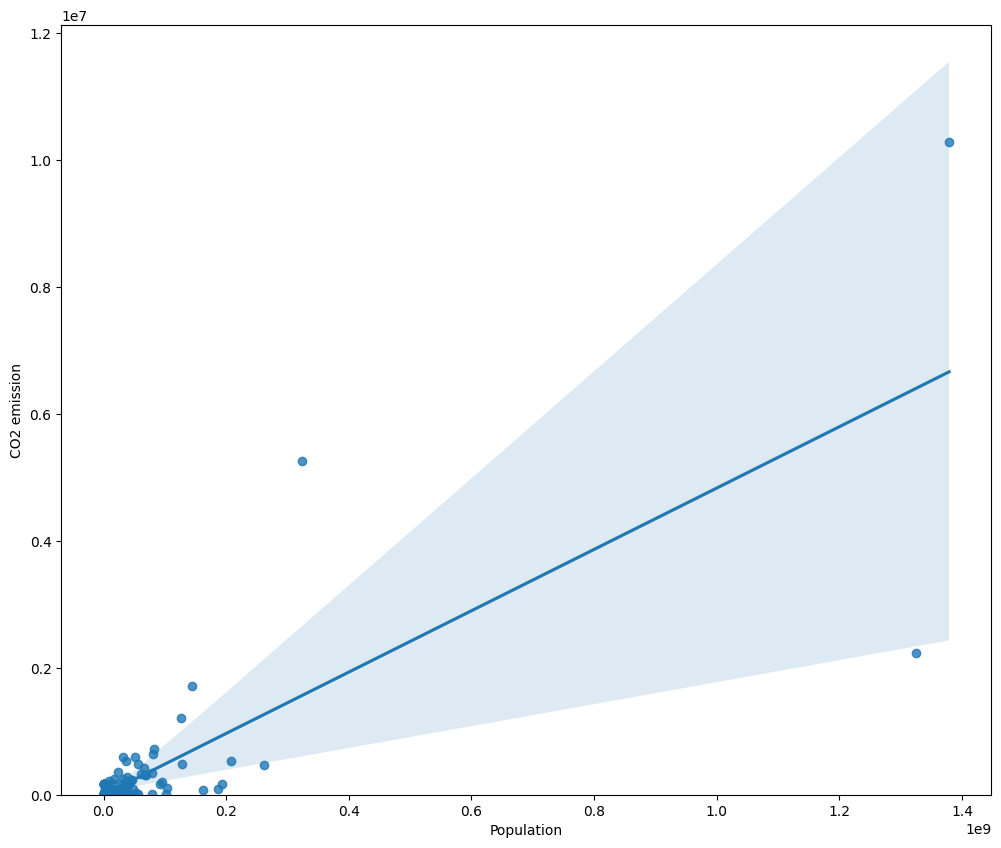

In [ ]:
import seaborn as sns
%matplotlib inline
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='Population', y='CO2 emission', data=df)
plt.ylim(0,)


Кут нахилу лінії регресійної є позитивним, тому існує позитивний зв'язок між чисельністю населення та обсягом викидів вуглекислого газу.

(0.0, 11348156.238928366)

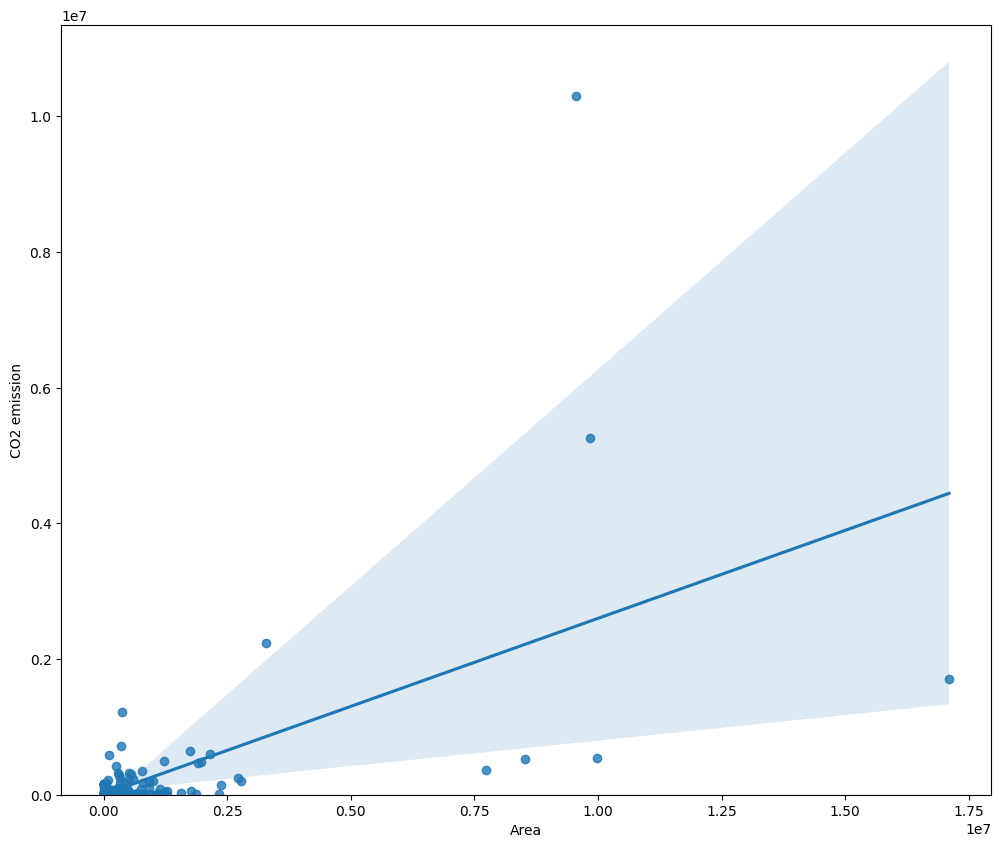

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='Area', y='CO2 emission', data=df)
plt.ylim(0,)


Також бачимо, що нахил лінійної регресії є позитивним, одже площа позитивно корелює з рівнем викидів СО2


Для візуалізації дисперсії даних використаю діаграми залишків.


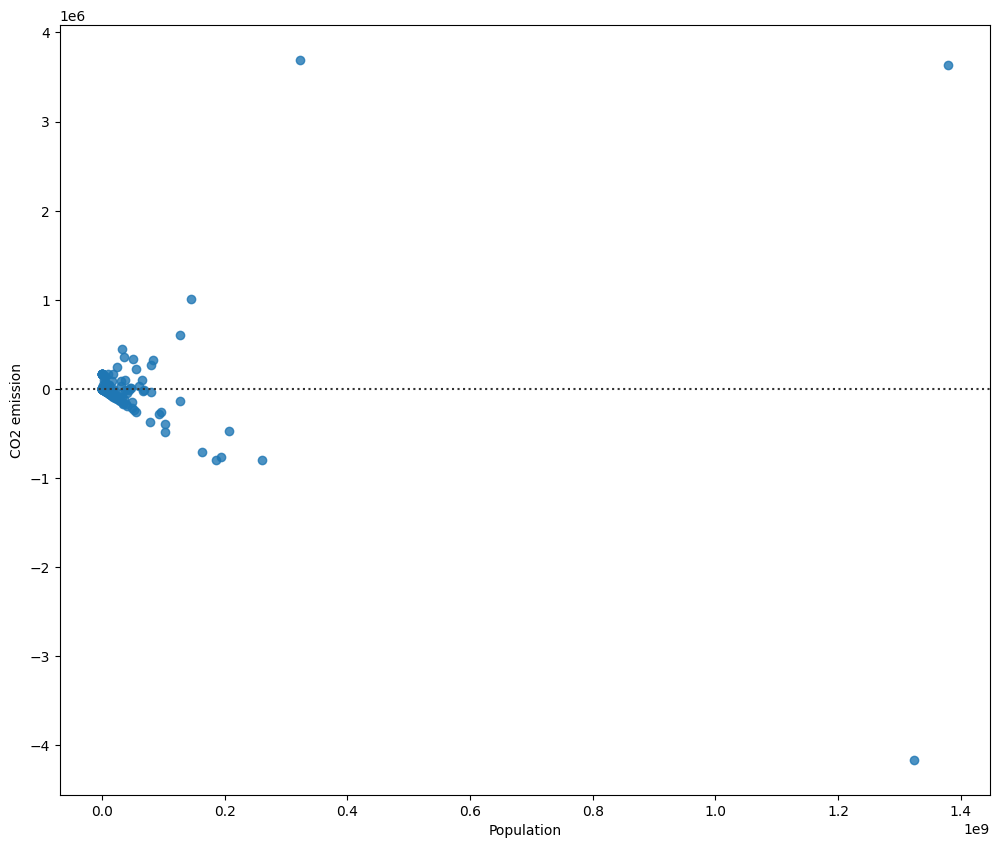

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['Population'], y=df['CO2 emission'])
plt.show()


На графіку залишків помітно, що розподіл залишків не є випадковим відносно осі абсцис; отже, це може свідчити про те, що для аналізу цих даних краще використовувати нелінійну модель.

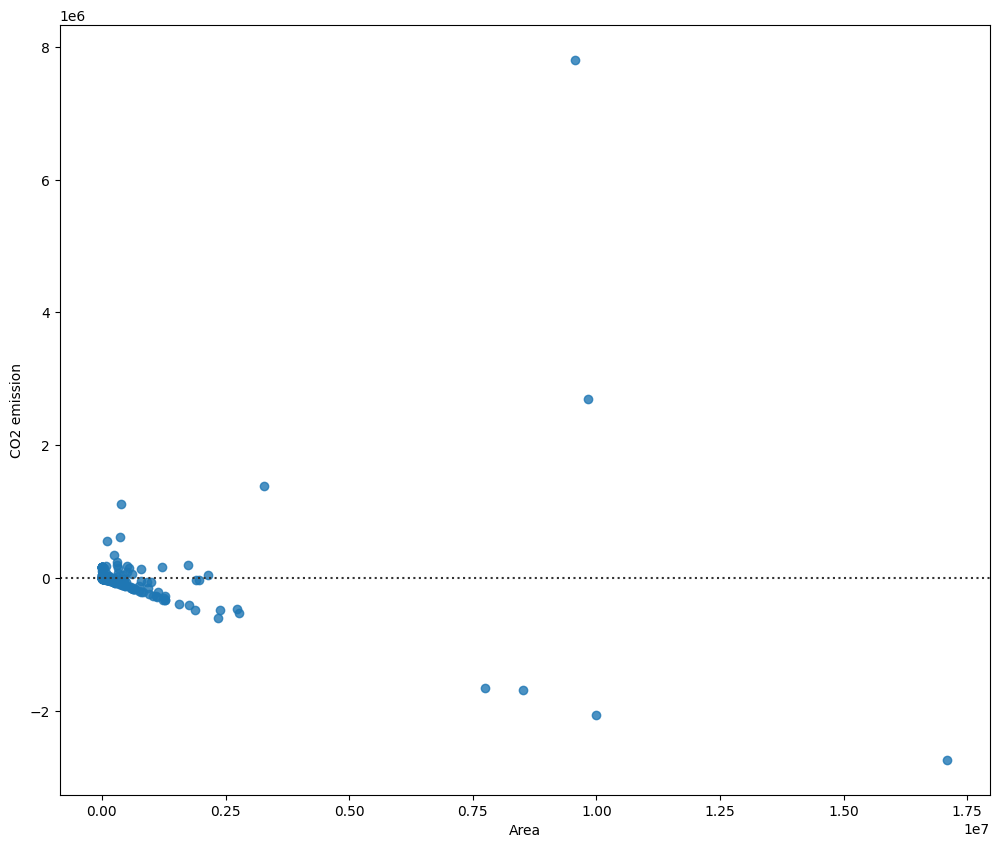

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['Area'], y=df['CO2 emission'])
plt.show()


Тут також помітно, що розподіл залишків не є випадковим відносно осі абсцис, отже, це може свідчити про те, що для аналізу цих даних краще використовувати нелінійну модель.

Для візуалізації моделі множинної лінійної регресії використаю діаграму розподілу.


<ipython-input-34-a9f842f59a26>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
<ipython-input-34-a9f842f59a26>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat, hist=False, color="b", label="Fitted V

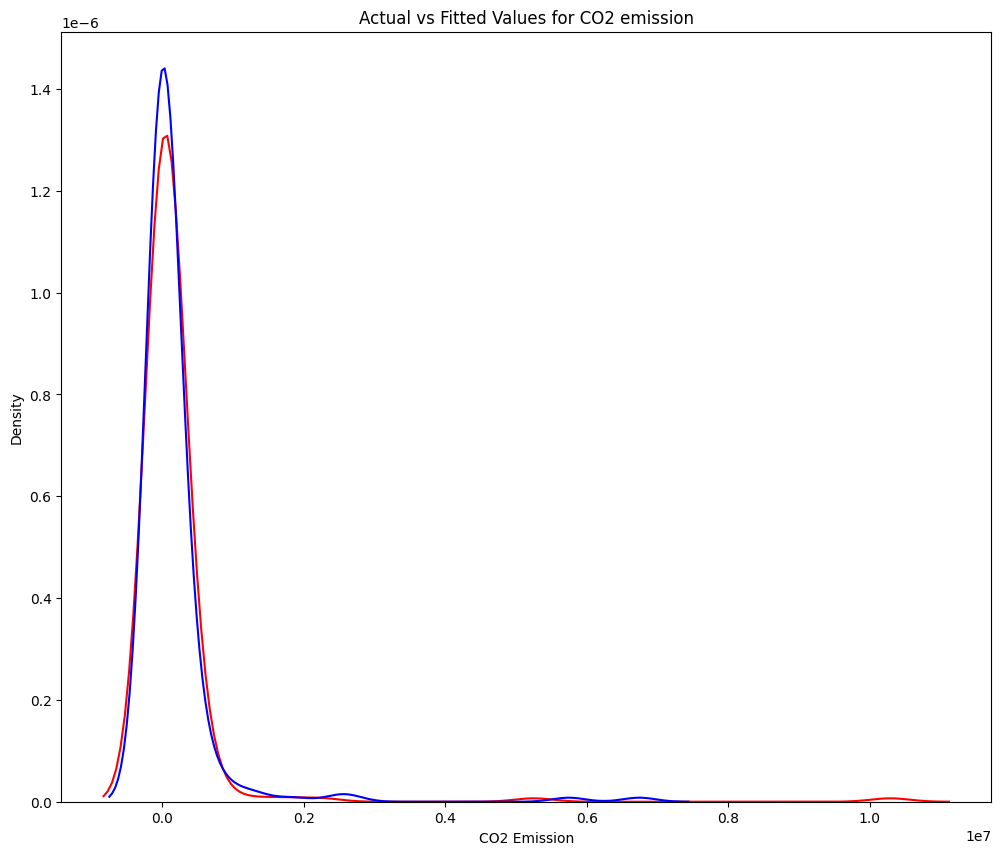

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
y_hat = lm3.predict(df[['Population', 'Area']])
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title("Actual vs Fitted Values for CO2 emission")
plt.xlabel("CO2 Emission")
plt.ylabel("Density")
plt.show()
plt.close()

 Підігнані значення досить близькі до фактичних , тому що два розподіли трохи накладаються.

Для візуалізації поліноміальних моделей з одним предиктором використаю функцію <code>poly1d</code>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print(np.poly1d(y_hat4))

            2
-3.004e-13 x + 0.00521 x - 7948


In [ ]:
print(np.poly1d(y_hat5))

            2
-1.484e-08 x + 0.436 x - 4.963e+04


Для візуалізації поліноміальних моделей з кількома предикторами використаю діаграму розподілу або діаграму залишків


<ipython-input-37-6ef75f6065c5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
<ipython-input-37-6ef75f6065c5>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat2, hist=False, color="b", label="Fitted 

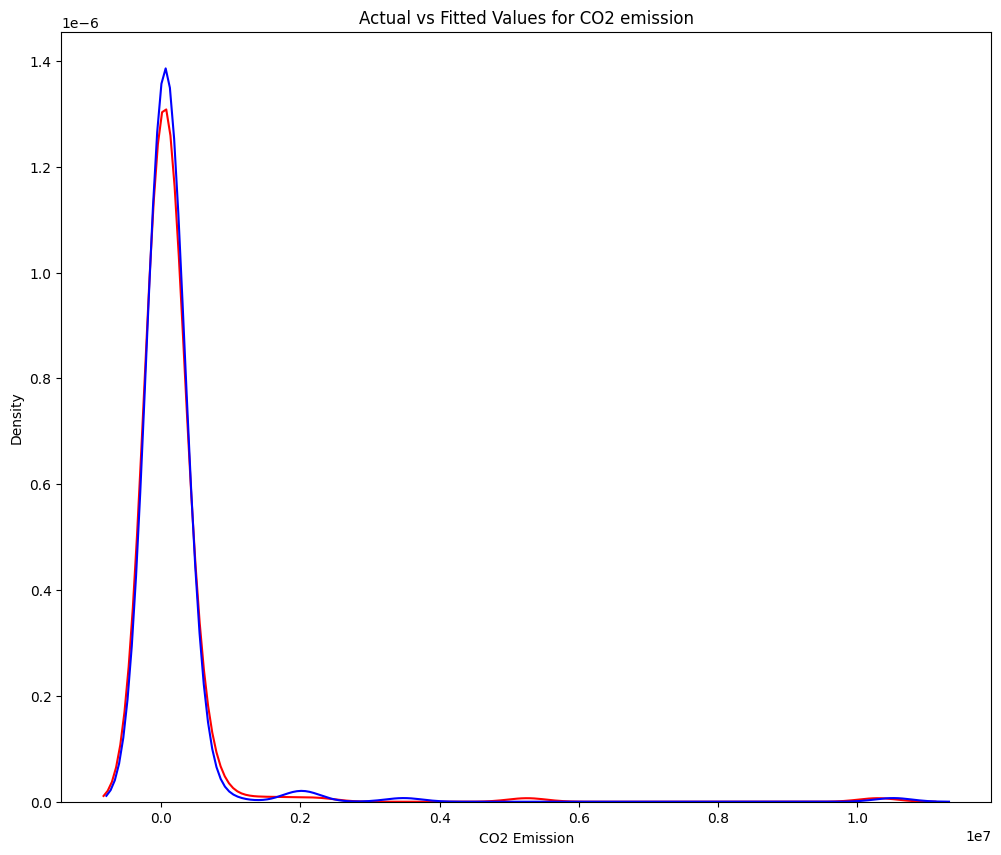

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
y_hat2 = y_hat6.predict(Z_pr)
sns.distplot(y_hat2, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title("Actual vs Fitted Values for CO2 emission")
plt.xlabel("CO2 Emission")
plt.ylabel("Density")
plt.show()
plt.close()

<a name="task5"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.</p>
</div>

Значення R^2 отримую безпосередньо з моделі <code>.score(X, Y)</code>, а для розрахунку MSE спочатку формую прогнозовані значення <code>.predict(X)</code> і порівнюю їх з фактичними


In [ ]:
x1 = df[['Population']]
x2 = df[['Area']]
y = df['CO2 emission']


Модель 1:
$$
Yhat1 = a + b  X
$$


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print('The R-square is: ', lm.score(x1, Y))

The R-square is:  0.6435755233131817


Можна сказати, що ~64.36% варіації рівня викидів СО2 пояснюється цією простою лінійною моделлю "Population_fit".


In [ ]:
Yhat=lm.predict(x1)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [166725.94304326  13118.67670299 195485.17184303   -514.12828729]


Порівнюємо прогнозовані результати з фактичними

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  232801816739.9179


Модель 2:
$$
Yhat2 = a + b  X
$$

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print('The R-square is: ', lm2.score(x2, Y))


The R-square is:  0.34282421100737426


Можна сказати, що ~34.28% варіації рівня викидів СО2 пояснюється цією простою лінійною моделлю "Area_fit"

In [ ]:
Yhat=lm2.predict(x2)
print('The output of the first four predicted value is: ', Yhat[0:4])


The output of the first four predicted value is:  [173940.73285816  11993.5518378  622559.15320471   4585.25519437]


In [ ]:
mse = mean_squared_error(y, Yhat)
print('The mean square error of price and predicted value is: ', mse)


The mean square error of price and predicted value is:  429240211045.894


Модель 3:
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
Z = df[['Population', 'Area']]
print('The R-square is: ', lm3.score(Z, Y))

The R-square is:  0.705452018011884


Можна сказати, що ~70.54% варіації рівня викидів СО2 пояснюється цією простою лінійною моделлю "Multi_fit".


In [ ]:
Y_predict_multifit = lm3.predict(Z)
print('The output of the first four predicted value is: ', \
 mean_squared_error(y, Y_predict_multifit))

The output of the first four predicted value is:  192386633940.86154


Модель 4:
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

In [ ]:
# Імпортуємо функцію r2_score з модуля metrics, оскільки використовуємо іншу функцію
from sklearn.metrics import r2_score

# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
p = np.poly1d(y_hat4)
r_squared = r2_score(y, p(x1))
print('The R-square value is: ', r_squared)

The R-square value is:  0.643890609154327


Можна сказати, що ~64.38% варіації рівня викидів СО2 пояснюється цією поліноміальною моделлю.

In [ ]:
mean_squared_error(y, p(x1))

232596015620.61905

Модель 5:
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
p = np.poly1d(y_hat5)
r_squared = r2_score(y, p(x2))
print('The R-square value is: ', r_squared)


The R-square value is:  0.3698523918567882


Можна сказати, що ~36.98% варіації рівня викидів СО2 пояснюється цією поліноміальною моделлю.

In [ ]:
mean_squared_error(y, p(x2))


411586514354.2175

Модель 6:
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
r_squared = y_hat6.score(Z_pr, Y)
print('The R-square value is: ', r_squared)

The R-square value is:  0.9359013231949528


Можна сказати, що ~93.59% варіації рівня викидів СО2 пояснюється цією поліноміальною моделлю.


mean_squared_error(y, y_hat6.predict(Z_pr))

<h4>Висновок</h4>

<p>Порівнюючи всі моделі, роблю висновок, що <b>модель y_hat6 є найкращою моделлю</b> для прогнозування 'CO2 emission' на основі нашого набору даних. </p>


<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте та оцініть кілька поліноміальних моделей різних порядків.</p>
</div>

1. Побудуйте кілька поліноміальних моделей різних порядків.
2. Побудуйте візуалізації для оцінки всіх моделей.
3. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.


1. Побудуйте кілька поліноміальних моделей різних порядків.

Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat7 = a + b_1 X_1 + b_2 X_1^2  
$$

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
y = df['Area']
x1 = df['Population']
x2 = df['CO2 emission']
y_hat7 = np.polyfit(x1, y, 2)
p7 = np.poly1d(y_hat7)
print(p7)


            2
-1.353e-11 x + 0.02313 x + 8.443e+04


Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat8 = a + b_1 X_1 + b_2 X_1^2 + b_3 X_1^3  
$$

In [ ]:
y_hat8 = np.polyfit(x1, y, 3)
p8 = np.poly1d(y_hat8)
print(p8)


           3             2
2.038e-20 x - 4.514e-11 x + 0.02863 x + 2.859e+04


Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat9 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

In [ ]:
pr=PolynomialFeatures(degree=2)
pr


PolynomialFeatures()

In [ ]:
Z = df[['Population', 'CO2 emission']]
Z_pr=pr.fit_transform(Z)
Z.shape

(217, 2)

У вихідних даних 217 спостереження і 2 ознаки

In [ ]:
Z_pr.shape

(217, 6)

Після трансформації маємо 217 спостереження і 6 ознак

In [ ]:
y_hat10 = LinearRegression()
y_hat10.fit(Z_pr, df[['Area']])

LinearRegression()

Знаходжу коефіцієнти моделі

In [ ]:
a = y_hat10.intercept_
b = y_hat10.coef_
print('a = ', a[0])
for i in range(1, len(b[0])):
 print(f'b{i} = ', b[0][i])


a =  -1610.9766762340441
b1 =  0.005381605382978716
b2 =  5.312197068236807
b3 =  -1.6232726100795514e-11
b4 =  5.998304950493167e-09
b5 =  -1.0079511807353051e-06


2. Побудова візуалізацій для оцінки моделі

<ipython-input-61-88379fd364b6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
<ipython-input-61-88379fd364b6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat15, hist=False, color="b", label="Fitted Values" , ax=ax1

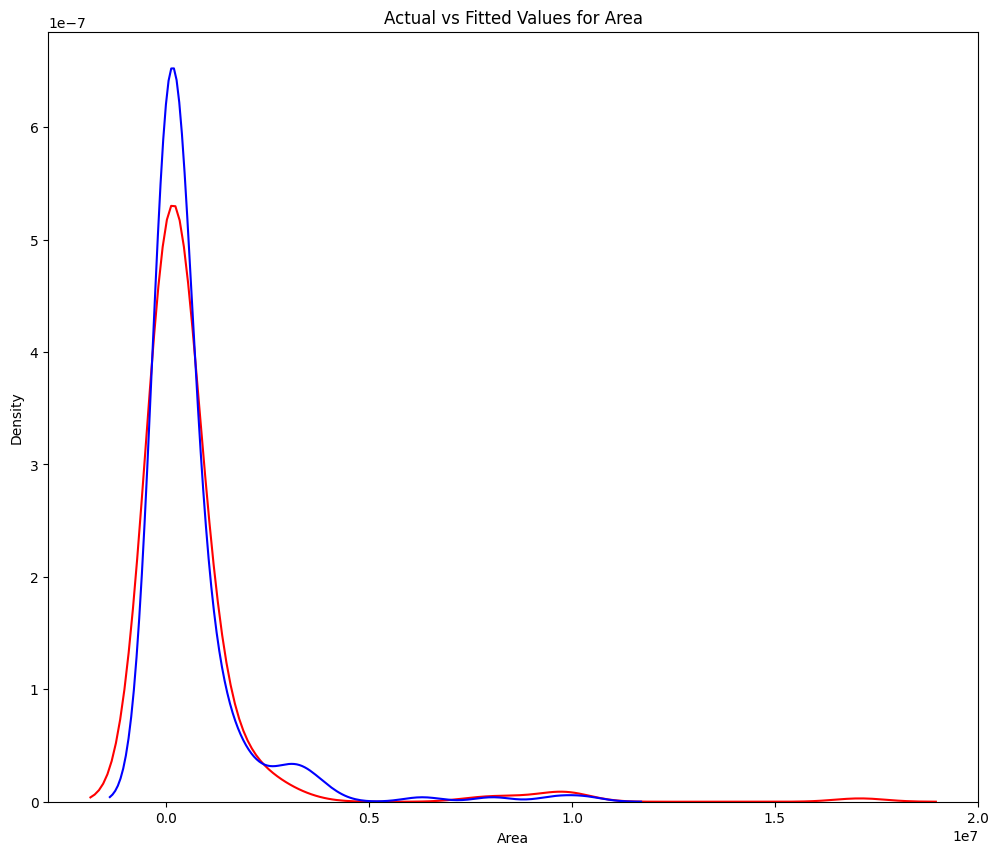

In [ ]:
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
y_hat15 = y_hat10.predict(Z_pr)
sns.distplot(y_hat15, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title("Actual vs Fitted Values for Area")
plt.xlabel("Area")
plt.ylabel("Density")
plt.show()
plt.close()

Підігнані значення досить близькі до фактичних , тому що два розподіли трохи накладаються.

<ipython-input-63-a48a40f5e3dd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, hist=False, color="r", label="Actual Value")
<ipython-input-63-a48a40f5e3dd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat_predicted, hist=False, color="b", label="Fitted Values")


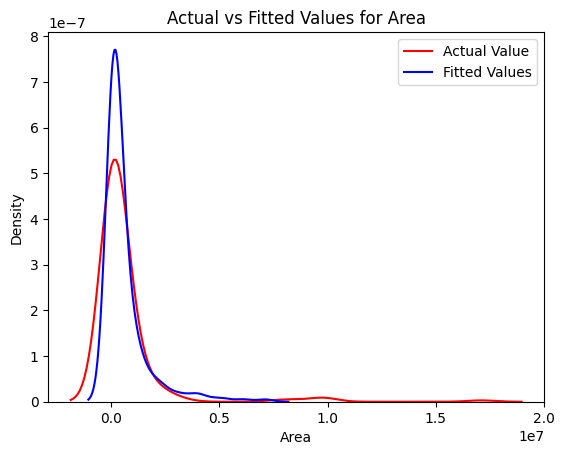

In [ ]:
sns.distplot(y, hist=False, color="r", label="Actual Value")
Yhat_predicted = p8(x1)
sns.distplot(Yhat_predicted, hist=False, color="b", label="Fitted Values")
plt.title("Actual vs Fitted Values for Area")
plt.xlabel("Area")
plt.ylabel("Density")
plt.legend()
plt.show()
plt.close()


Підігнані значення не такі близькі до фактичних , тому що два розподіли не завжди накладаються.

<ipython-input-64-443109ee78f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, hist=False, color="r", label="Actual Value")
<ipython-input-64-443109ee78f8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat_predicted, hist=False, color="b", label="Fitted Values")


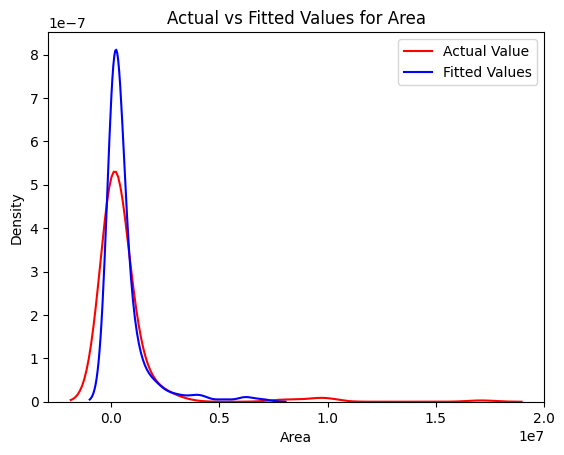

In [ ]:
sns.distplot(y, hist=False, color="r", label="Actual Value")
Yhat_predicted = p7(x1)
sns.distplot(Yhat_predicted, hist=False, color="b", label="Fitted Values")
plt.title("Actual vs Fitted Values for Area")
plt.xlabel("Area")
plt.ylabel("Density")
plt.legend()
plt.show()
plt.close()

Значення розходяться

3. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.


In [ ]:
print('The R-square is: ', r2_score(y, p7(x1)))
mse = mean_squared_error(y, p7(x1))
print('The mean square error of price and predicted value is: ', mse)

The R-square is:  0.3312603114344269
The mean square error of price and predicted value is:  2223939278717.754


Можна сказати, що ~33.12% варіації площі пояснюється цією поліноміальною моделлю.

In [ ]:
print('The R-square is: ', r2_score(y, p8(x1)))
mse = mean_squared_error(y, p8(x1))
print('The mean square error of price and predicted value is: ', mse)

The R-square is:  0.3362811344624962
The mean square error of price and predicted value is:  2207242190546.4736


Можна сказати, що ~33.62% варіації площі пояснюється цією поліноміальною моделлю.

In [ ]:
print('The R-square is: ', y_hat10.score(Z_pr, df[['Area']]))
mse = mean_squared_error(df[['Area']], y_hat10.predict(Z_pr))
print('The mean square error of price and predicted value is: ', mse)

The R-square is:  0.5522722568174003
The mean square error of price and predicted value is:  1488949035417.992


Можна сказати, що ~55.22% варіації площі пояснюється цією поліноміальною моделлю.


Висновок:

Таким чином, модель ( y_hat10 ), яка представляє собою багатофакторну поліноміальну регресію другого порядку, виявляється оптимальним вибором для прогнозування, оскільки вона має найвищий показник ( R^2 ) та найменшу середньоквадратичну помилку (MSE).

<h2>Виконав студент групи ІП-21<br>  Скрипець Ольга</h2>